<a href="https://colab.research.google.com/github/dboyko44/ML-Final-Project/blob/main/ML_Final_Project_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

dft22=pd.read_excel('teamreport_31-12-2021_30-05-2022.xlsx')
dfSOE22=pd.read_excel('SOE data 2022.xlsx')
for i in range(len(dft22)):
  dft22['Day'][i]=pd.Timestamp(dft22["Day"][i])
dft22.sort_values(by='Day',inplace=True)

dft23=pd.read_excel('teamreport_31-12-2022_30-12-2023.xlsx')
dfSOE23=pd.read_excel('SOE data 2023.xlsx')
for i in range(len(dft23)):
  dft23['Day'][i]=pd.Timestamp(dft23["Day"][i])
dft23.sort_values(by='Day',inplace=True)

def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return ss + 60*(mm + 60*hh)

for i in range(0,len(dft22)):
  dft22=dft22.replace([dft22['Duration'][i]],[dft22['Duration'][i].strftime("%H:%M:%S")])
  dft22=dft22.replace([dft22['Duration'][i]],[time_to_num(dft22['Duration'][i])])
for i in range(0,len(dft23)):
  dft23=dft23.replace([dft23['Duration'][i]],[dft23['Duration'][i].strftime("%H:%M:%S")])
  dft23=dft23.replace([dft23['Duration'][i]],[time_to_num(dft23['Duration'][i])])

<ipython-input-265-c2b7e0463716>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft22['Day'][i]=pd.Timestamp(dft22["Day"][i])
<ipython-input-265-c2b7e0463716>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft23['Day'][i]=pd.Timestamp(dft23["Day"][i])


In [ ]:
for i in range(0,len(dft22)):
  if dft22['Maximum speed [mph]'][i]>27.5:
    ind=dft22[(dft22['Duration']==dft22['Duration'][i])].index
    dft22=dft22.drop(ind)

dft22=dft22.reset_index(drop=True)


In [ ]:
for i in range(len(dfSOE22)-1):
  start_date22=dfSOE22['Day'][i]
  end_date22=dfSOE22['Day'][i+1]
  group22=dft22[(dft22['Day']>start_date22) & (dft22['Day']<=end_date22)].index.tolist()
  print(group22)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[27, 28, 29, 30]
[31, 32, 33]
[34, 35, 36, 37]
[38, 39, 40]
[41, 42, 43, 44, 45, 46, 47]
[48, 49, 50, 51, 52, 53]
[54, 55, 56, 57]
[58, 59, 60]
[61, 62, 63, 64, 65]
[66, 67, 68, 69, 70, 71]
[72, 73, 74, 75, 76, 77]
[78, 79, 80, 81, 82, 83]
[84, 85, 86, 87, 88, 89, 90]
[91, 92, 93]
[94, 95, 96, 97, 98, 99, 100, 101]


In [ ]:
for i in range(len(dfSOE23)-1):
  start_date23=dfSOE23['Day'][i]
  end_date23=dfSOE23['Day'][i+1]
  group23=dft23[(dft23['Day']>start_date23) & (dft23['Day']<=end_date23)].index.tolist()
  print(group23)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40]
[41, 42, 43]
[44, 45, 46, 47, 48, 49, 50]
[51, 52, 53, 54, 55, 56]
[57]
[58, 59]
[60, 61, 62]
[63, 64, 65]
[66, 67, 68]
[69, 70, 71, 72, 73]


In [ ]:
dfin22=pd.DataFrame(columns=['Length [days]','Average heart rate [bpm]','Average distance [yd]','Average speed [mph]', 'Average calories [kcal]', 'Average training load','Total training load'])
dfin23=pd.DataFrame(columns=['Length [days]','Average heart rate [bpm]','Average distance [yd]','Average speed [mph]', 'Average calories [kcal]', 'Average training load','Total training load'])

dfin22=dfin22.iloc[0:0]
for i in range(len(dfSOE22)-1):
  start_date22=dfSOE22['Day'][i]
  end_date22=dfSOE22['Day'][i+1]
  group22=dft22[(dft22['Day']>start_date22) & (dft22['Day']<=end_date22)].index.tolist()
  length22=len(group22)
  avgheartrate22=np.mean(dft22['HR avg [bpm]'][group22[0]:group22[-1]+1])    
  avgdistance22=np.mean(dft22['Total distance [yd]'][group22[0]:group22[-1]+1])
  avgspeed22=np.mean(dft22['Average speed [mph]'][group22[0]:group22[-1]+1])
  avgcal22=np.mean(dft22['Calories [kcal]'][group22[0]:group22[-1]+1])
  avgtload22=np.mean(dft22['Training load score'][group22[0]:group22[-1]+1])
  tottload22=sum(dft22['Training load score'][group22[0]:group22[-1]+1])
  dfin22.loc[len(dfin22.index)]=[length22, avgheartrate22,avgdistance22,avgspeed22,avgcal22,avgtload22,tottload22]

dfSOE22=dfSOE22.drop(0)

dfin23=dfin23.iloc[0:0]
for i in range(len(dfSOE23)-1):
  start_date23=dfSOE23['Day'][i]
  end_date23=dfSOE23['Day'][i+1]
  group23=dft23[(dft23['Day']>start_date23) & (dft23['Day']<=end_date23)].index.tolist()
  length23=len(group23)
  avgheartrate23=np.mean(dft23['HR avg [bpm]'][group23[0]:group23[-1]+1])    
  avgdistance23=np.mean(dft23['Total distance [yd]'][group23[0]:group23[-1]+1])
  avgspeed23=np.mean(dft23['Average speed [mph]'][group23[0]:group23[-1]+1])
  avgcal23=np.mean(dft23['Calories [kcal]'][group23[0]:group23[-1]+1])
  avgtload23=np.mean(dft23['Training load score'][group23[0]:group23[-1]+1])
  tottload23=sum(dft23['Training load score'][group23[0]:group23[-1]+1])
  dfin23.loc[len(dfin23.index)]=[length23, avgheartrate23,avgdistance23,avgspeed23,avgcal23,avgtload23,tottload23]

dfSOE23=dfSOE23.drop(0)

<ipython-input-269-b73a86aa1506>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfin23.loc[len(dfin23.index)]=[length23, avgheartrate23,avgdistance23,avgspeed23,avgcal23,avgtload23,tottload23]
<ipython-input-269-b73a86aa1506>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfin23.loc[len(dfin23.index)]=[length23, avgheartrate23,avgdistance23,avgspeed23,avgcal23,avgtload23,tottload23]
<ipython-input-269-b73a86aa1506>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

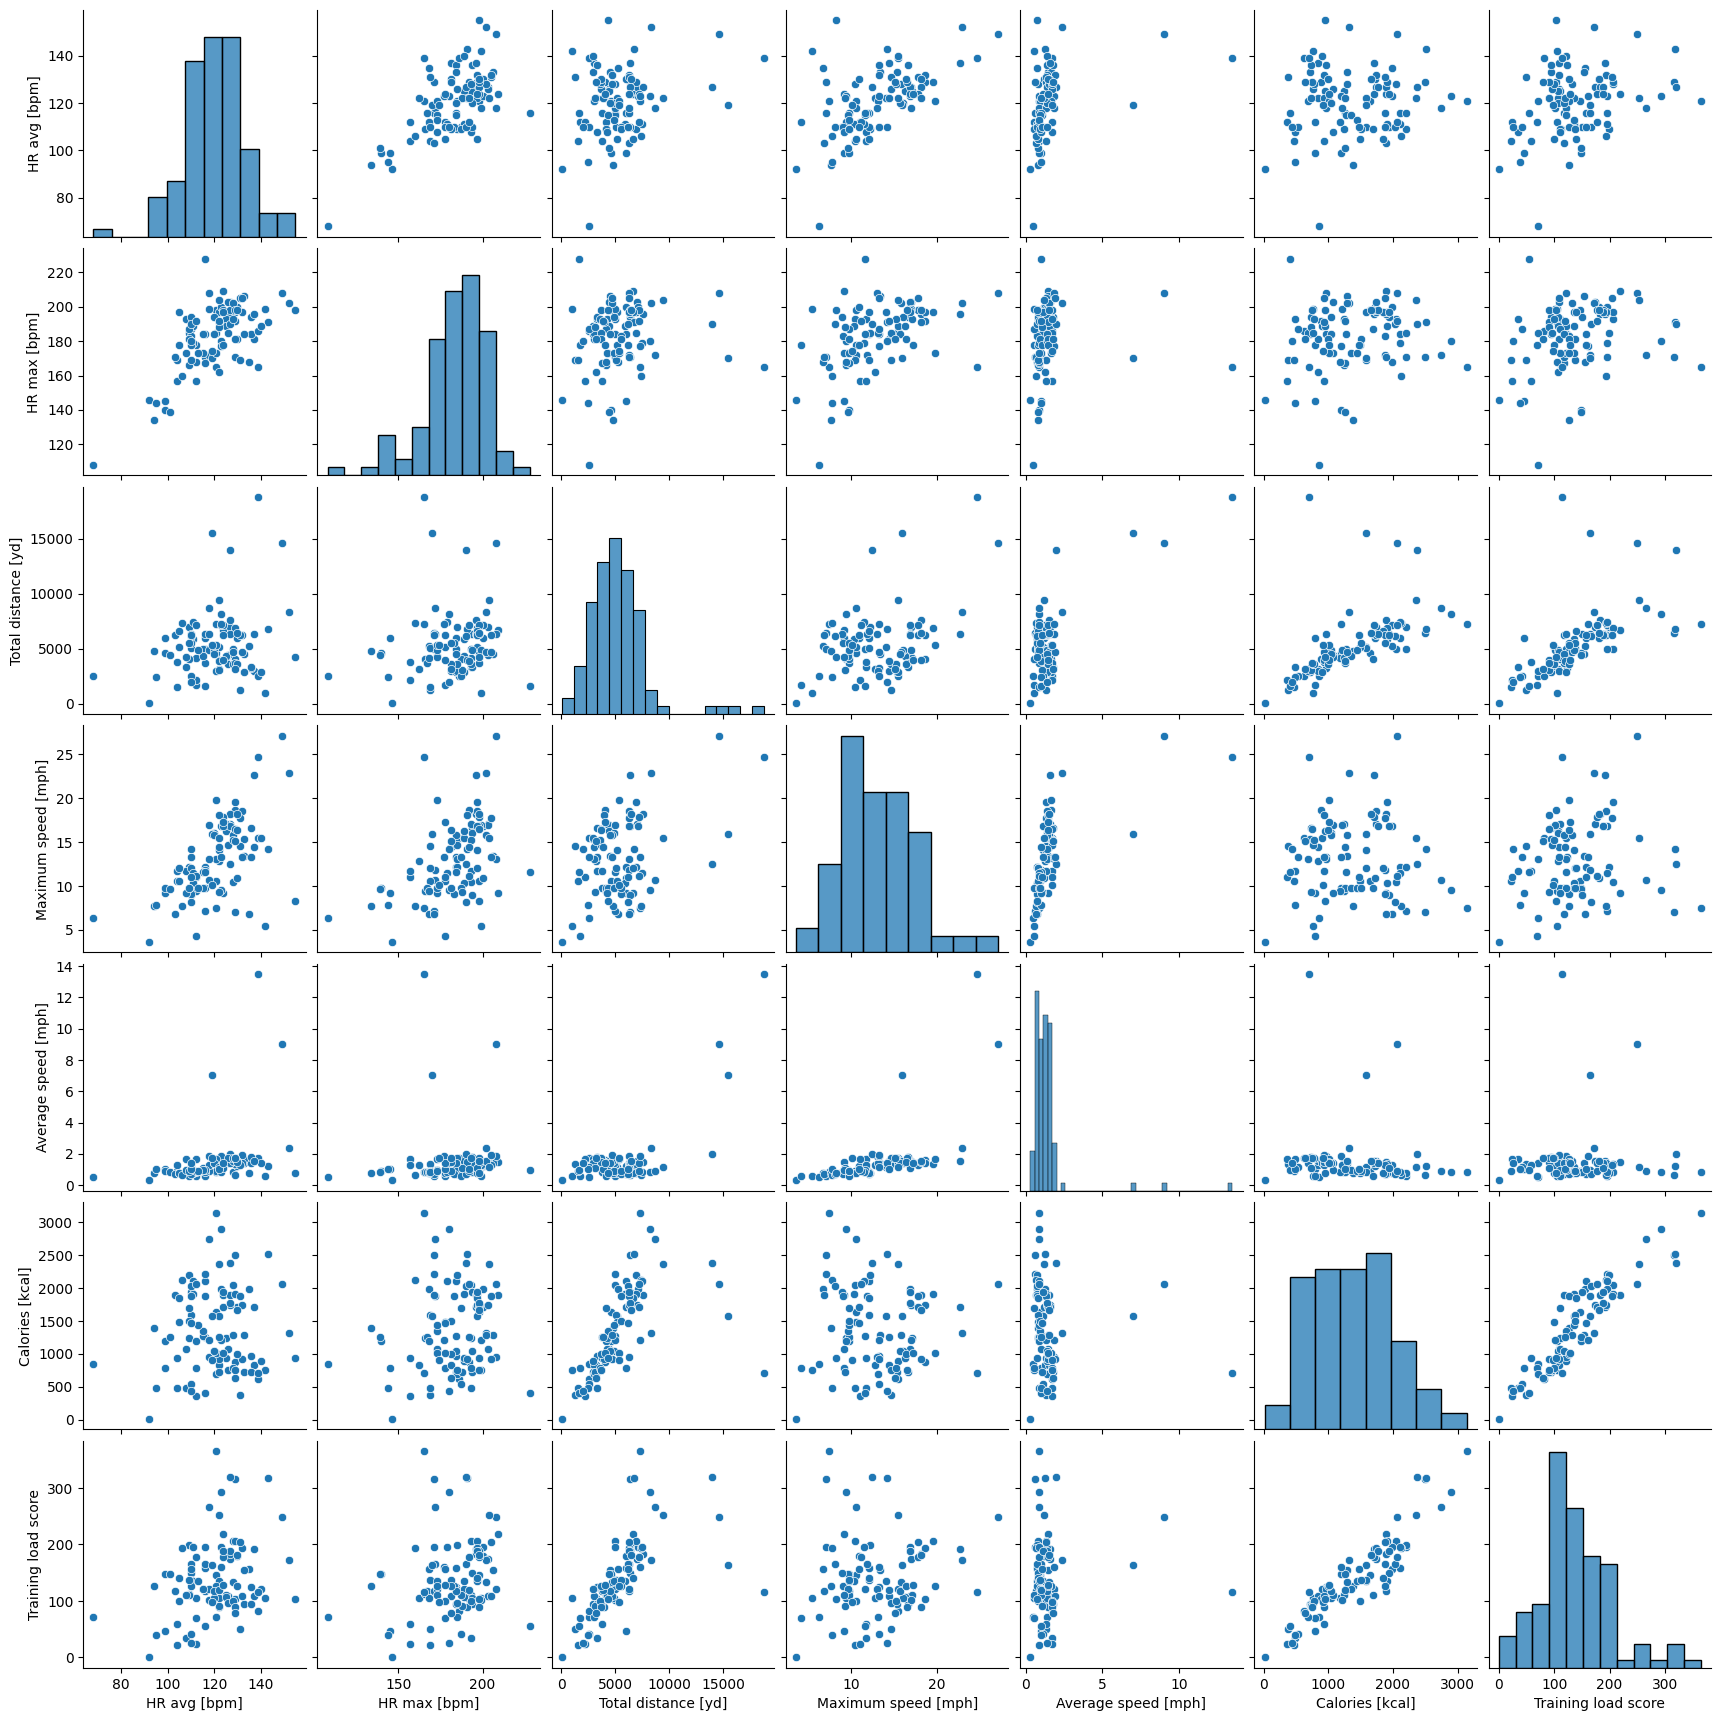

In [ ]:
sns.pairplot(dft22.drop(labels=['Day','Duration'],axis=1))

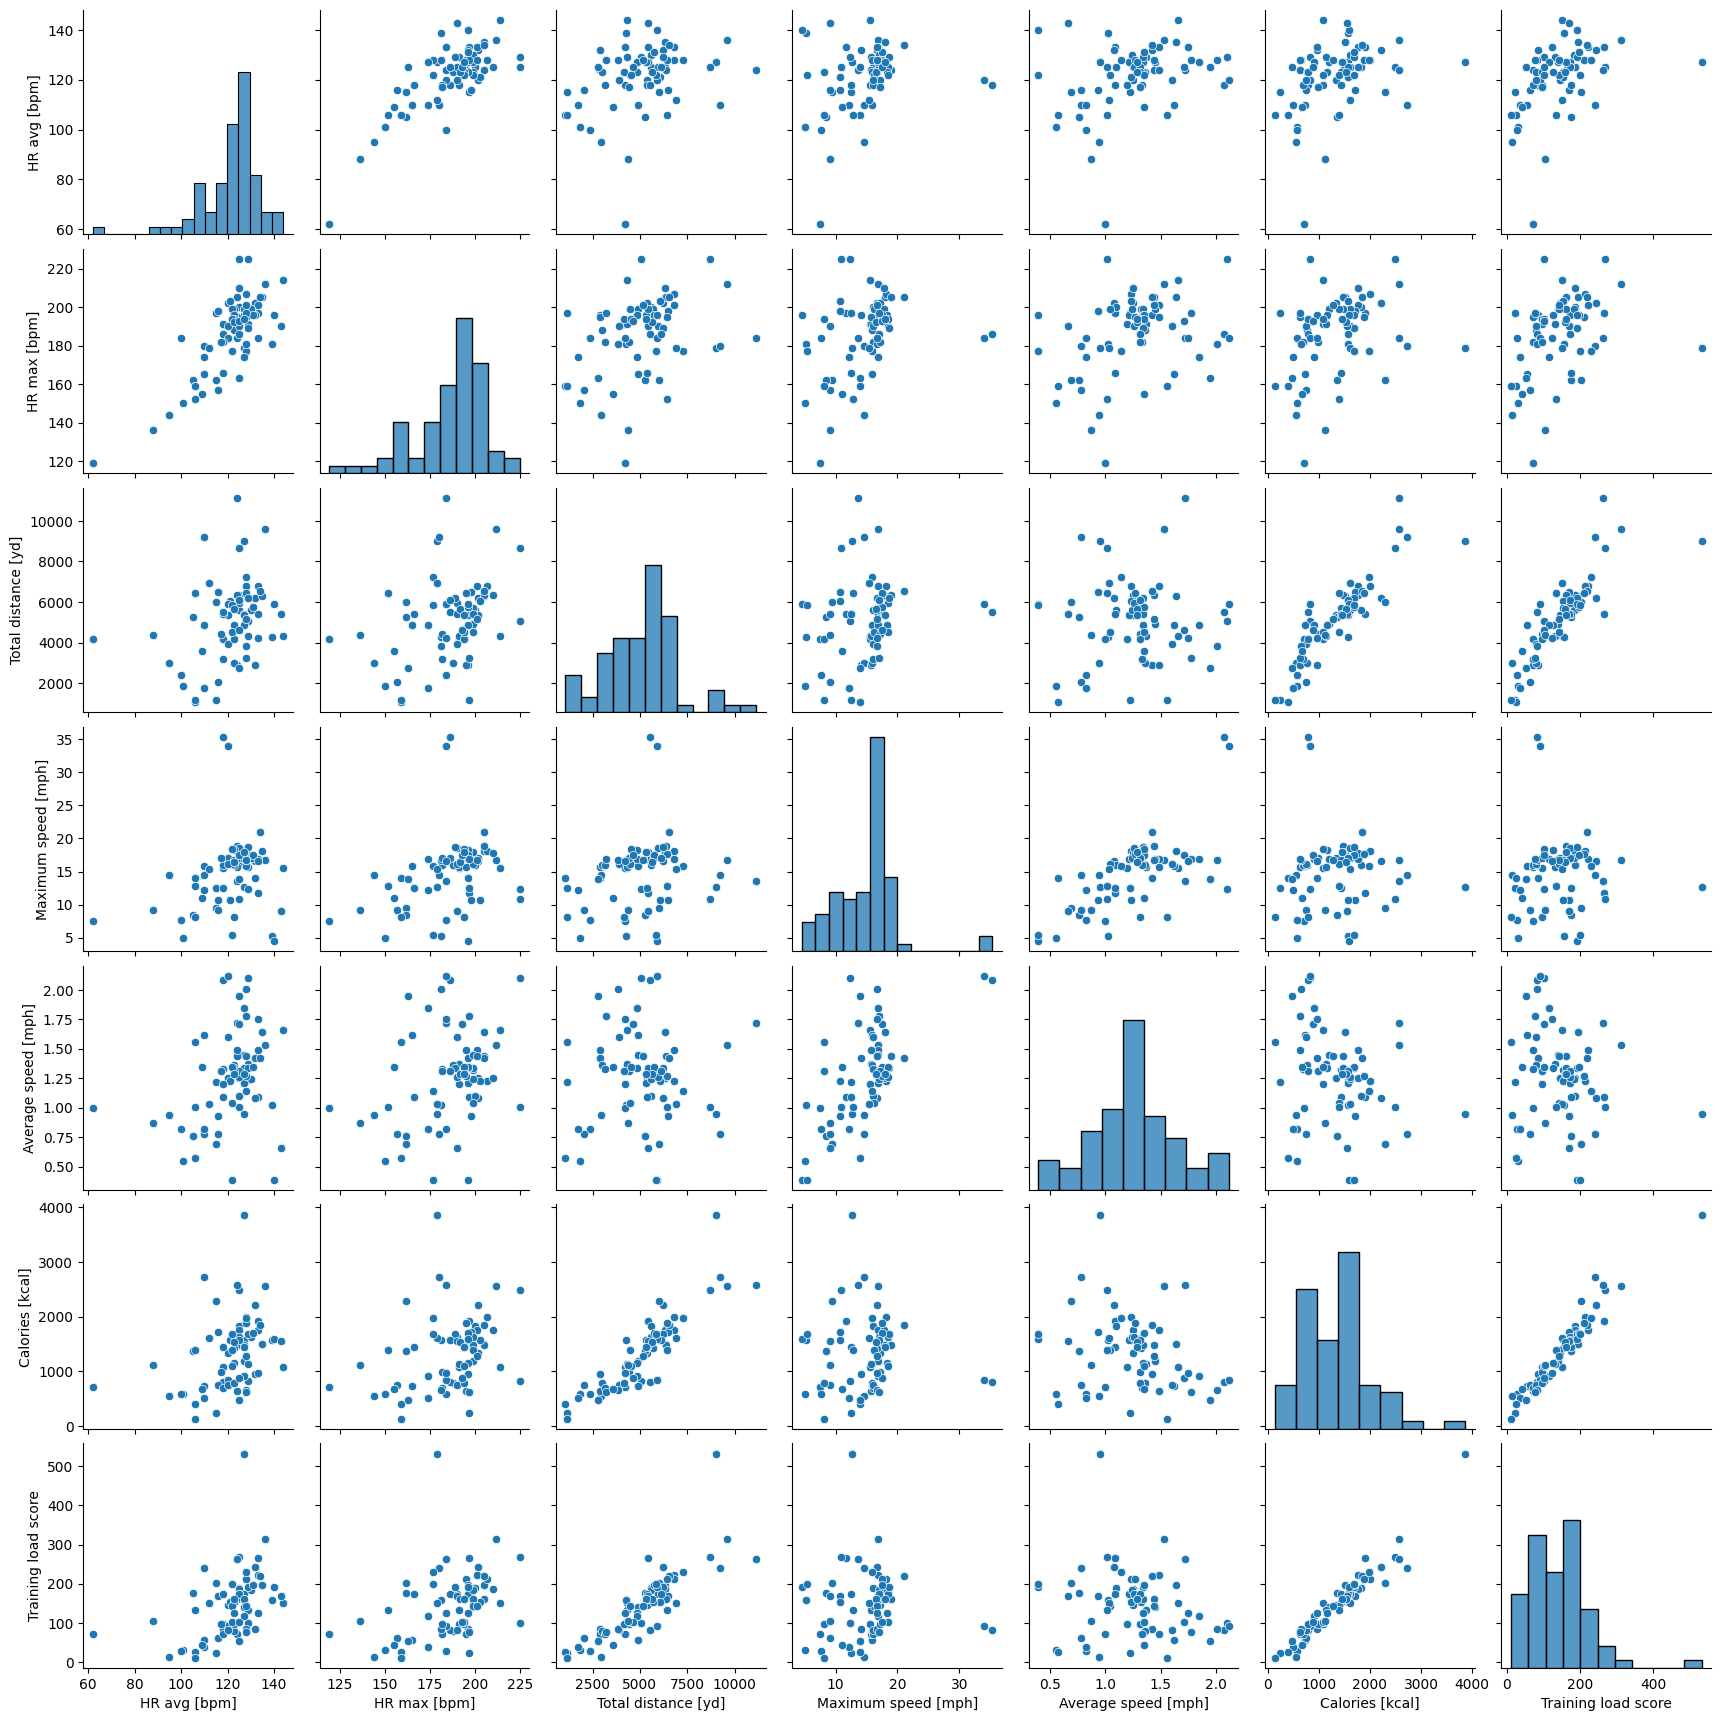

In [ ]:
sns.pairplot(dft23.drop(labels=['Day','Duration'],axis=1))

In [ ]:
#normalize data
norm_dfin22=(dfin22-dfin22.mean())/dfin22.std()
norm_dfin23=(dfin23-dfin23.mean())/dfin23.std()

#split dataset into input (x) and output (y)
Xtrain=norm_dfin22.to_numpy()
ytrain=dfSOE22['Percent SOE'].to_numpy()
#ytrain=(ytrain-ytrain.mean())/ytrain.std()

Xtest=norm_dfin23.to_numpy()
ytest=dfSOE23['Percent SOE'].to_numpy()
#ytest=(ytest-ytest.mean())/ytest.std()

In [428]:
norm_dfin23

,Length [days],Average heart rate [bpm],Average distance [yd],Average speed [mph],Average calories [kcal],Average training load,Total training load
0,2.694205,0.262694,1.135503,0.053191,1.895662,1.983636,3.007594
1,0.264748,-1.067511,0.873648,-0.662808,1.111566,0.286086,0.187229
2,1.277022,-0.533228,0.560966,0.043201,0.432956,0.270577,0.926689
3,-0.545070,0.214768,-0.267633,0.189757,0.253952,0.140298,-0.423087
4,-0.545070,-0.132129,1.347037,1.708173,-0.500395,-0.402533,-0.475162
5,0.264748,-0.286994,-1.127697,-0.403331,-0.252010,-0.323435,0.050793
6,0.062294,-0.999371,-0.620173,-0.026473,-0.796795,-1.015931,-0.211664
7,-0.949980,2.166062,1.382746,-2.491497,1.501159,1.877355,-0.656382
8,-0.747525,1.580674,-0.486276,0.233003,-0.488758,-0.239684,-0.591809
9,-0.545070,-0.348939,-0.210460,-0.723215,-0.310097,-0.087691,-0.444958


In [ ]:
#new data
Xtrain_new=norm_dfin22.drop(labels=['Average speed [mph]', 'Average calories [kcal]','Total training load'],axis=1).to_numpy()
Xtest_new=norm_dfin23.drop(labels=['Average speed [mph]', 'Average calories [kcal]','Total training load'],axis=1).to_numpy()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i in range(3,25): 
  #define keras model
  model = Sequential()
  model.add(Dense(i,input_dim=7,activation='sigmoid'))
  model.add(Dense(1))

  #compile the keras model
  opt = optimizers.Adam(learning_rate=0.001)
  mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
  model.compile(loss=mse, optimizer=opt)

  #fit the keras model on the dataset (CPU)
  model.fit(Xtrain,ytrain,epochs=500,batch_size=1, verbose=0)
  model.summary()

  #make class predictions with the model
  predictions = model.predict(Xtest)

  #for i in range(len(ytest)):
   #   print('%s => %.2f (expected %.2f)' %(Xtest[i].tolist(), predictions[i], ytest[i]) )

  print("R2 score =", round(r2_score(ytest,predictions),2))
  print("mean squared error =", round(mean_squared_error(ytest,predictions),5))

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 3)                 24        
                                                                 
 dense_169 (Dense)           (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 57ms/step
R2 score = -1.35
mean squared error = 0.0961
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 4)                 32        
                                                                 
 dense_171 (Dense)           (None, 1)                 5         
   

In [ ]:
#best model results 7 inputs
#define keras model
model = Sequential()
model.add(Dense(18,input_dim=7,activation='sigmoid'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(Xtrain,ytrain,epochs=500,batch_size=1, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(Xtest)

for i in range(len(ytest)):
   print('%s => %.2f (expected %.2f)' %(Xtest[i].tolist(), predictions[i], ytest[i]) )

print("R2 score =", round(r2_score(ytest,predictions),2))
print("mean squared error =", round(mean_squared_error(ytest,predictions),5))

Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_272 (Dense)           (None, 18)                144       
                                                                 
 dense_273 (Dense)           (None, 1)                 19        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 59ms/step
[2.694205125587371, 0.26269431606065985, 1.135503296975009, 0.05319058564912107, 1.895661848029736, 1.9836355202572795, 3.00759445637884] => 0.48 (expected 1.00)
[0.264748480549048, -1.0675114229789537, 0.8736481105414743, -0.6628075617818527, 1.1115656071323357, 0.2860863942243022, 0.1872285832704869] => 0.36 (expected 0.73)
[1.2770220826483494, -0.5332284193389614, 0.5609656323821268, 0.043201

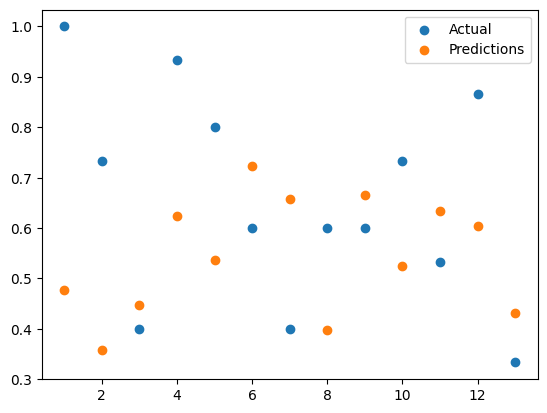

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=predictions, label='Predictions')
plt.legend(loc='best')

In [ ]:
#for less inputs
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i in range(3,25): 
  #define keras model
  model = Sequential()
  model.add(Dense(i,input_dim=4,activation='sigmoid'))
  model.add(Dense(1))

  #compile the keras model
  opt = optimizers.Adam(learning_rate=0.001)
  mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
  model.compile(loss=mse, optimizer=opt)

  #fit the keras model on the dataset (CPU)
  model.fit(Xtrain_new,ytrain,epochs=500,batch_size=1, verbose=0)
  model.summary()

  #make class predictions with the model
  predictions2 = model.predict(Xtest_new)

  #for i in range(len(ytest)):
   #   print('%s => %.2f (expected %.2f)' %(Xtest[i].tolist(), predictions[i], ytest[i]) )

  print("R2 score =", round(r2_score(ytest,predictions2),2))
  print("mean squared error =", round(mean_squared_error(ytest,predictions2),5))

Model: "sequential_189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_378 (Dense)           (None, 3)                 15        
                                                                 
 dense_379 (Dense)           (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 66ms/step
R2 score = -1.38
mean squared error = 0.0973
Model: "sequential_190"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 4)                 20        
                                                                 
 dense_381 (Dense)           (None, 1)                 5         
 

In [ ]:
#best model results 4 inputs
#define keras model
model = Sequential()
model.add(Dense(6,input_dim=4,activation='sigmoid'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(Xtrain_new,ytrain,epochs=500,batch_size=1, verbose=0)
model.summary()

#make class predictions with the model
predictions2 = model.predict(Xtest_new)

for i in range(len(ytest)):
   print('%s => %.2f (expected %.2f)' %(Xtest_new[i].tolist(), predictions[i], ytest[i]) )

print("R2 score =", round(r2_score(ytest,predictions2),2))
print("mean squared error =", round(mean_squared_error(ytest,predictions2),5))

Model: "sequential_238"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 6)                 30        
                                                                 
 dense_477 (Dense)           (None, 1)                 7         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 57ms/step
[2.694205125587371, 0.26269431606065985, 1.135503296975009, 1.9836355202572795] => 0.48 (expected 1.00)
[0.264748480549048, -1.0675114229789537, 0.8736481105414743, 0.2860863942243022] => 0.36 (expected 0.73)
[1.2770220826483494, -0.5332284193389614, 0.5609656323821268, 0.27057695327670317] => 0.45 (expected 0.40)
[-0.5450704011303931, 0.2147677857570272, -0.2676327733291253, 0.14029764931687289] 

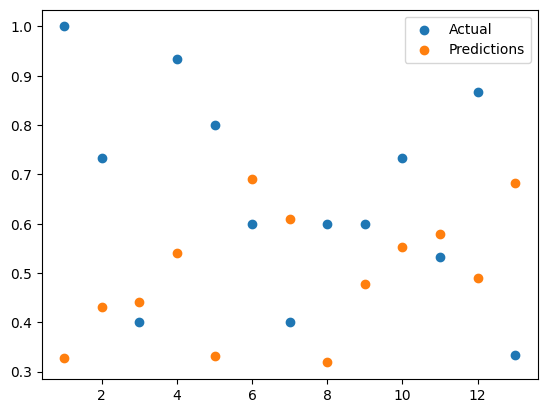

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=predictions2, label='Predictions')
plt.legend(loc='best')

In [431]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF_reg=RandomForestRegressor()
RF_reg.fit(Xtrain,ytrain)
pred_rf=RF_reg.predict(Xtest)

print("R2 score =", round(r2_score(ytest,pred_rf),2))
print("mean squared error =", round(mean_squared_error(ytest,pred_rf),5))

R2 score = -1.18
mean squared error = 0.0892


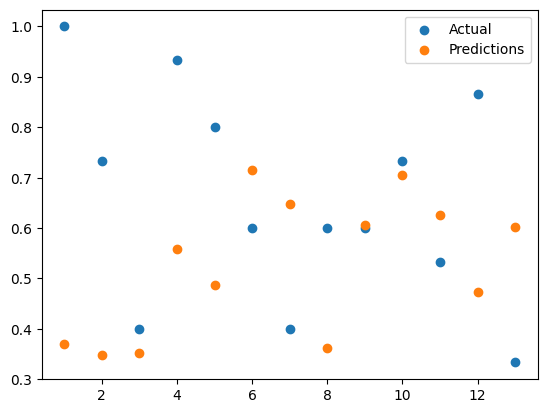

In [ ]:
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=pred_rf, label='Predictions')
plt.legend(loc='best')

In [432]:
#for less inputs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF_reg=RandomForestRegressor()
RF_reg.fit(Xtrain_new,ytrain)
pred_rf2=RF_reg.predict(Xtest_new)

print("R2 score =", round(r2_score(ytest,pred_rf),2))
print("mean squared error =", round(mean_squared_error(ytest,pred_rf2),5))

R2 score = -1.18
mean squared error = 0.08844


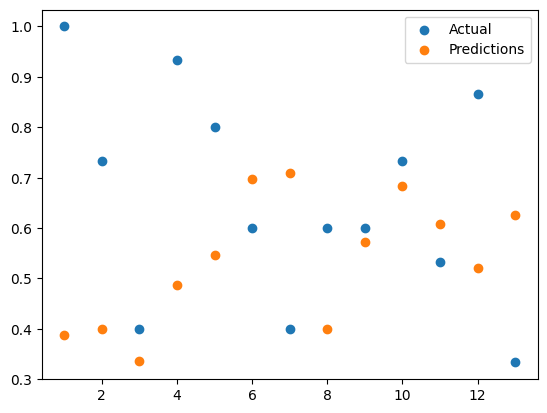

In [ ]:
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=pred_rf2, label='Predictions')
plt.legend(loc='best')

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
SV=SVR(kernel='rbf',gamma='auto', coef0=0.0, tol=0.001, C=1.0, 
       epsilon=.1, shrinking=True, cache_size=100, verbose=False, max_iter=-1)
SV.fit(Xtrain,ytrain)
pred_sv=SV.predict(Xtest)
print("R2 score =", round(r2_score(ytest,pred_sv),2))
print("mean squared error =", round(mean_squared_error(ytest,pred_sv),5))

R2 score = -1.19
mean squared error = 0.08962


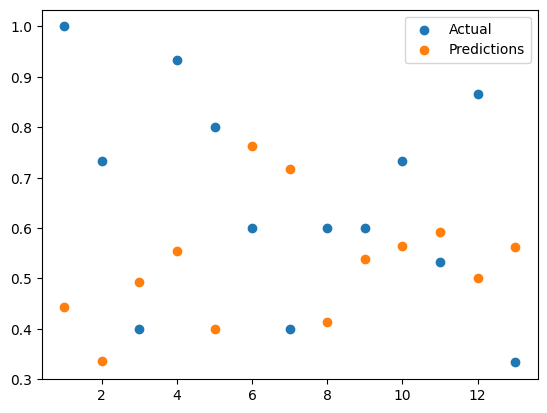

In [ ]:
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=pred_sv, label='Predictions')
plt.legend(loc='best')

In [403]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
SV=SVR(kernel='rbf', gamma='scale', coef0=0.0, tol=0.001, C=1.0, 
       epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
SV.fit(Xtrain_new,ytrain)
pred_sv2=SV.predict(Xtest_new)
print("R2 score =", round(r2_score(ytest,pred_sv2),2))
print("mean squared error =", round(mean_squared_error(ytest,pred_sv2),5))

R2 score = -1.35
mean squared error = 0.09611


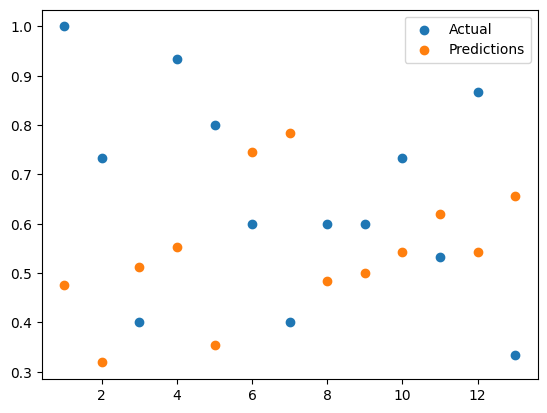

In [ ]:
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=pred_sv2, label='Predictions')
plt.legend(loc='best')

R2 score = -0.8
mean squared error = 0.07375


[Text(0.5, 0.875, 'x[2] <= -0.099\nsquared_error = 0.045\nsamples = 17\nvalue = 0.49'),
 Text(0.25, 0.625, 'x[3] <= -0.359\nsquared_error = 0.017\nsamples = 6\nvalue = 0.679'),
 Text(0.125, 0.375, 'squared_error = 0.0\nsamples = 3\nvalue = 0.786'),
 Text(0.375, 0.375, 'squared_error = 0.01\nsamples = 3\nvalue = 0.571'),
 Text(0.75, 0.625, 'x[3] <= 2.31\nsquared_error = 0.031\nsamples = 11\nvalue = 0.388'),
 Text(0.625, 0.375, 'x[5] <= -0.081\nsquared_error = 0.028\nsamples = 10\nvalue = 0.411'),
 Text(0.5, 0.125, 'squared_error = 0.049\nsamples = 2\nvalue = 0.637'),
 Text(0.75, 0.125, 'squared_error = 0.007\nsamples = 8\nvalue = 0.354'),
 Text(0.875, 0.375, 'squared_error = -0.0\nsamples = 1\nvalue = 0.154')]

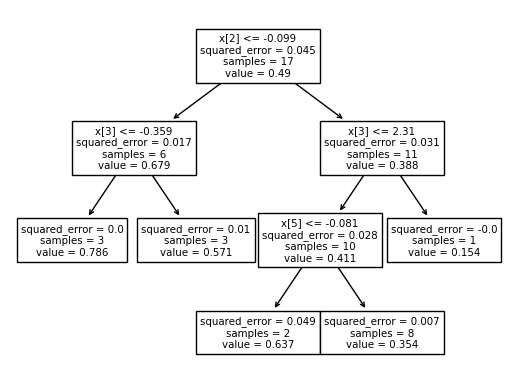

In [425]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
dt_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=None, 
                               max_leaf_nodes=5, min_impurity_decrease=0.0, ccp_alpha=0.0)
dt_reg.fit(Xtrain, ytrain)
y_pred_dt = dt_reg.predict(Xtest)

print("R2 score =", round(r2_score(ytest,y_pred_dt),2))
print("mean squared error =", round(mean_squared_error(ytest,y_pred_dt),5))
plot_tree(dt_reg)

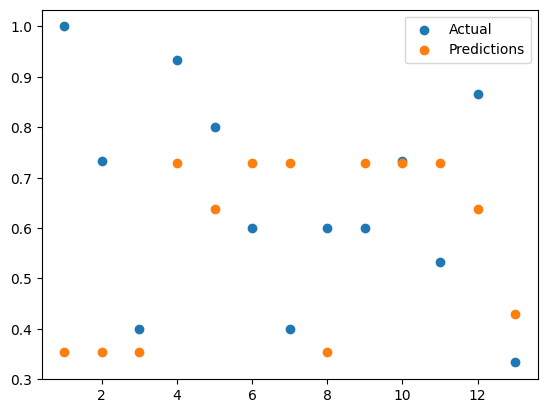

In [ ]:
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=y_pred_dt, label='Predictions')
plt.legend(loc='best')

[2.694205125587371, 0.26269431606065985, 1.135503296975009, 1.9836355202572795] => 0.46 (expected 1.00)
[0.264748480549048, -1.0675114229789537, 0.8736481105414743, 0.2860863942243022] => 0.46 (expected 0.73)
[1.2770220826483494, -0.5332284193389614, 0.5609656323821268, 0.27057695327670317] => 0.46 (expected 0.40)
[-0.5450704011303931, 0.2147677857570272, -0.2676327733291253, 0.14029764931687289] => 0.64 (expected 0.93)
[-0.5450704011303931, -0.13212900501212754, 1.3470374000272993, -0.4025327838490865] => 0.86 (expected 0.80)
[0.264748480549048, -0.28699364374835695, -1.1276966941804976, -0.3234346350163323] => 0.79 (expected 0.60)
[0.062293760129187734, -0.9993709819350116, -0.6201734298149221, -1.0159311733266208] => 0.79 (expected 0.40)
[-0.9499798419701136, 2.1660622338335194, 1.382746306468599, 1.877355035447944] => 0.32 (expected 0.60)
[-0.7475251215502533, 1.5806738994105716, -0.48627601125858655, -0.23968365389929855] => 0.64 (expected 0.60)
[-0.5450704011303931, -0.3489394992

[Text(0.39285714285714285, 0.9, 'x[2] <= -0.099\nsquared_error = 0.045\nsamples = 17\nvalue = 0.49'),
 Text(0.14285714285714285, 0.7, 'x[3] <= -1.203\nsquared_error = 0.017\nsamples = 6\nvalue = 0.679'),
 Text(0.07142857142857142, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 0.429'),
 Text(0.21428571428571427, 0.5, 'x[1] <= -0.232\nsquared_error = 0.005\nsamples = 5\nvalue = 0.729'),
 Text(0.14285714285714285, 0.3, 'squared_error = 0.0\nsamples = 3\nvalue = 0.786'),
 Text(0.2857142857142857, 0.3, 'x[1] <= 1.026\nsquared_error = 0.0\nsamples = 2\nvalue = 0.643'),
 Text(0.21428571428571427, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.643'),
 Text(0.35714285714285715, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.643'),
 Text(0.6428571428571429, 0.7, 'x[3] <= -0.842\nsquared_error = 0.031\nsamples = 11\nvalue = 0.388'),
 Text(0.5714285714285714, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 0.154'),
 Text(0.7142857142857143, 0.5, 'x[3] <= -0.081\nsquared_error = 0.028\nsamp

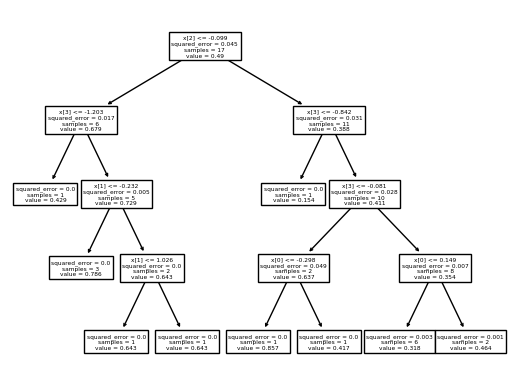

In [416]:
#for less inputs
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
dt_reg2 = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=4, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                               max_leaf_nodes=10, min_impurity_decrease=0.0, ccp_alpha=0.0)
dt_reg2.fit(Xtrain_new, ytrain)
y_pred_dt2 = dt_reg2.predict(Xtest_new) 

for i in range(len(ytest)):
      print('%s => %.2f (expected %.2f)' %(Xtest_new[i].tolist(), y_pred_dt2[i], ytest[i]) )

print("R2 score =", round(r2_score(ytest,y_pred_dt2),2))
print("mean squared error =", round(mean_squared_error(ytest,y_pred_dt2),5))
plot_tree(dt_reg2)

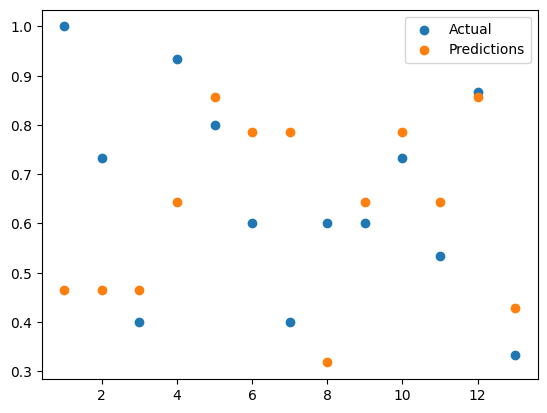

In [414]:
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'], label='Actual')
plt.scatter(x=dfSOE23.index,y=y_pred_dt2, label='Predictions')
plt.legend(loc='best')